In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, Normalizer, StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [19]:
df = pd.read_csv(r'C:\Users\aidag\OneDrive\Escritorio\ironhack\sharks\attacks.csv', encoding='latin1')

In [20]:
df.head(5)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


In [21]:
df.dtypes

Case Number                object
Date                       object
Year                      float64
Type                       object
Country                    object
Area                       object
Location                   object
Activity                   object
Name                       object
Sex                        object
Age                        object
Injury                     object
Fatal (Y/N)                object
Time                       object
Species                    object
Investigator or Source     object
pdf                        object
href formula               object
href                       object
Case Number.1              object
Case Number.2              object
original order            float64
Unnamed: 22                object
Unnamed: 23                object
dtype: object

In [22]:
df.isna().sum()

Case Number               17021
Date                      19421
Year                      19423
Type                      19425
Country                   19471
Area                      19876
Location                  19961
Activity                  19965
Name                      19631
Sex                       19986
Age                       22252
Injury                    19449
Fatal (Y/N)               19960
Time                      22775
Species                   22259
Investigator or Source    19438
pdf                       19421
href formula              19422
href                      19421
Case Number.1             19421
Case Number.2             19421
original order            19414
Unnamed: 22               25722
Unnamed: 23               25721
dtype: int64

In [23]:
df.head(5)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


In [25]:
df.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

In [26]:
df

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
df2 = df[["Date", "Type", "Country","Area", "Activity", "Fatal (Y/N)", "Time", "Species "]]

In [28]:
df2.columns = df2.columns.str.replace(" ", "")
df2.head()

,Date,Type,Country,Area,Activity,Fatal(Y/N),Time,Species
0,25-Jun-2018,Boating,USA,California,Paddling,N,18h00,White shark
1,18-Jun-2018,Unprovoked,USA,Georgia,Standing,N,14h00 -15h00,NaN
2,09-Jun-2018,Invalid,USA,Hawaii,Surfing,N,07h45,NaN
3,08-Jun-2018,Unprovoked,AUSTRALIA,New South Wales,Surfing,N,NaN,2 m shark
4,04-Jun-2018,Provoked,MEXICO,Colima,Free diving,N,NaN,"Tiger shark, 3m"


In [29]:
df_cleaned = df2.dropna()
df_cleaned.head(10)

,Date,Type,Country,Area,Activity,Fatal(Y/N),Time,Species
0,25-Jun-2018,Boating,USA,California,Paddling,N,18h00,White shark
6,03-Jun-2018,Unprovoked,BRAZIL,Pernambuco,Swimming,Y,Late afternoon,Tiger shark
8,26-May-2018,Unprovoked,USA,Florida,Walking,N,17h00,"Bull shark, 6'"
10,24-May-2018,Provoked,AUSTRALIA,Queensland,Feeding sharks,N,Morning,Grey reef shark
13,13-May-2018,Invalid,ENGLAND,Cornwall,Fishing,N,08h15,Invalid incident
16,09-May-2018,Questionable,AUSTRALIA,New South Wales,Surfing,N,10h30,Shark involvement not confirmed
18,28-Apr-2018,Unprovoked,COSTA RICA,Cocos Island,Scuba diving,N,10h40,Tiger shark
20,25-Apr-2018,Questionable,AUSTRALIA,New South Wales,Surfing,N,07h00,Questionable
21,25-Apr-2018,Unprovoked,AUSTRALIA,Western Australia,Surfing,N,09h30,3 m shark
22,24-Apr-2018,Unprovoked,AUSTRALIA,Western Australia,Surfing,N,Afternoon,"White shark, 3.5 m"


In [30]:
def convert_to_time_category(time_str):
    if str(time_str).lower() in ['morning', 'afternoon', 'late afternoon', 'night']:
        return time_str.lower()
    try:
        
        time_dt = pd.to_datetime(time_str, format='%Hh%M', errors='raise')

    
        if 6 <= time_dt.hour < 12:
            return 'morning'
        elif 12 <= time_dt.hour < 18:
            return 'afternoon'
        elif 18 <= time_dt.hour < 21:
            return 'late afternoon'
        else:
            return 'night'
    except ValueError:

        return ''

df_cleaned['Time'] = df_cleaned['Time'].apply(convert_to_time_category)
df_cleaned

C:\Users\aidag\AppData\Local\Temp\ipykernel_146412\819960356.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Time'] = df_cleaned['Time'].apply(convert_to_time_category)


,Date,Type,Country,Area,Activity,Fatal(Y/N),Time,Species
0,25-Jun-2018,Boating,USA,California,Paddling,N,late afternoon,White shark
6,03-Jun-2018,Unprovoked,BRAZIL,Pernambuco,Swimming,Y,late afternoon,Tiger shark
8,26-May-2018,Unprovoked,USA,Florida,Walking,N,afternoon,"Bull shark, 6'"
10,24-May-2018,Provoked,AUSTRALIA,Queensland,Feeding sharks,N,morning,Grey reef shark
13,13-May-2018,Invalid,ENGLAND,Cornwall,Fishing,N,morning,Invalid incident
...,...,...,...,...,...,...,...,...
6021,26-Feb-1852,Sea Disaster,SOUTH AFRICA,Western Cape Province,Wreck of the steamship Birkenhead,Y,night,White sharks
6200,Before 2009,Unprovoked,USA,Florida,Shark tagging,N,late afternoon,"Blacktip shark, 5'"
6242,1960s,Unprovoked,IRAQ,Basrah,Swimming naked near a date palm where many dat...,N,afternoon,Bull shark
6243,1960s,Unprovoked,IRAQ,Basrah,Swimming in section of river used for washing ...,N,afternoon,Bull shark


In [32]:
df_cleaned.columns

Index(['Date', 'Type', 'Country', 'Area', 'Activity', 'Fatal(Y/N)', 'Time',
       'Species'],
      dtype='object')

C:\Users\aidag\AppData\Local\Temp\ipykernel_146412\846674435.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date'], errors='coerce')
C:\Users\aidag\AppData\Local\Temp\ipykernel_146412\846674435.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Year'] = df_cleaned['Date'].dt.year


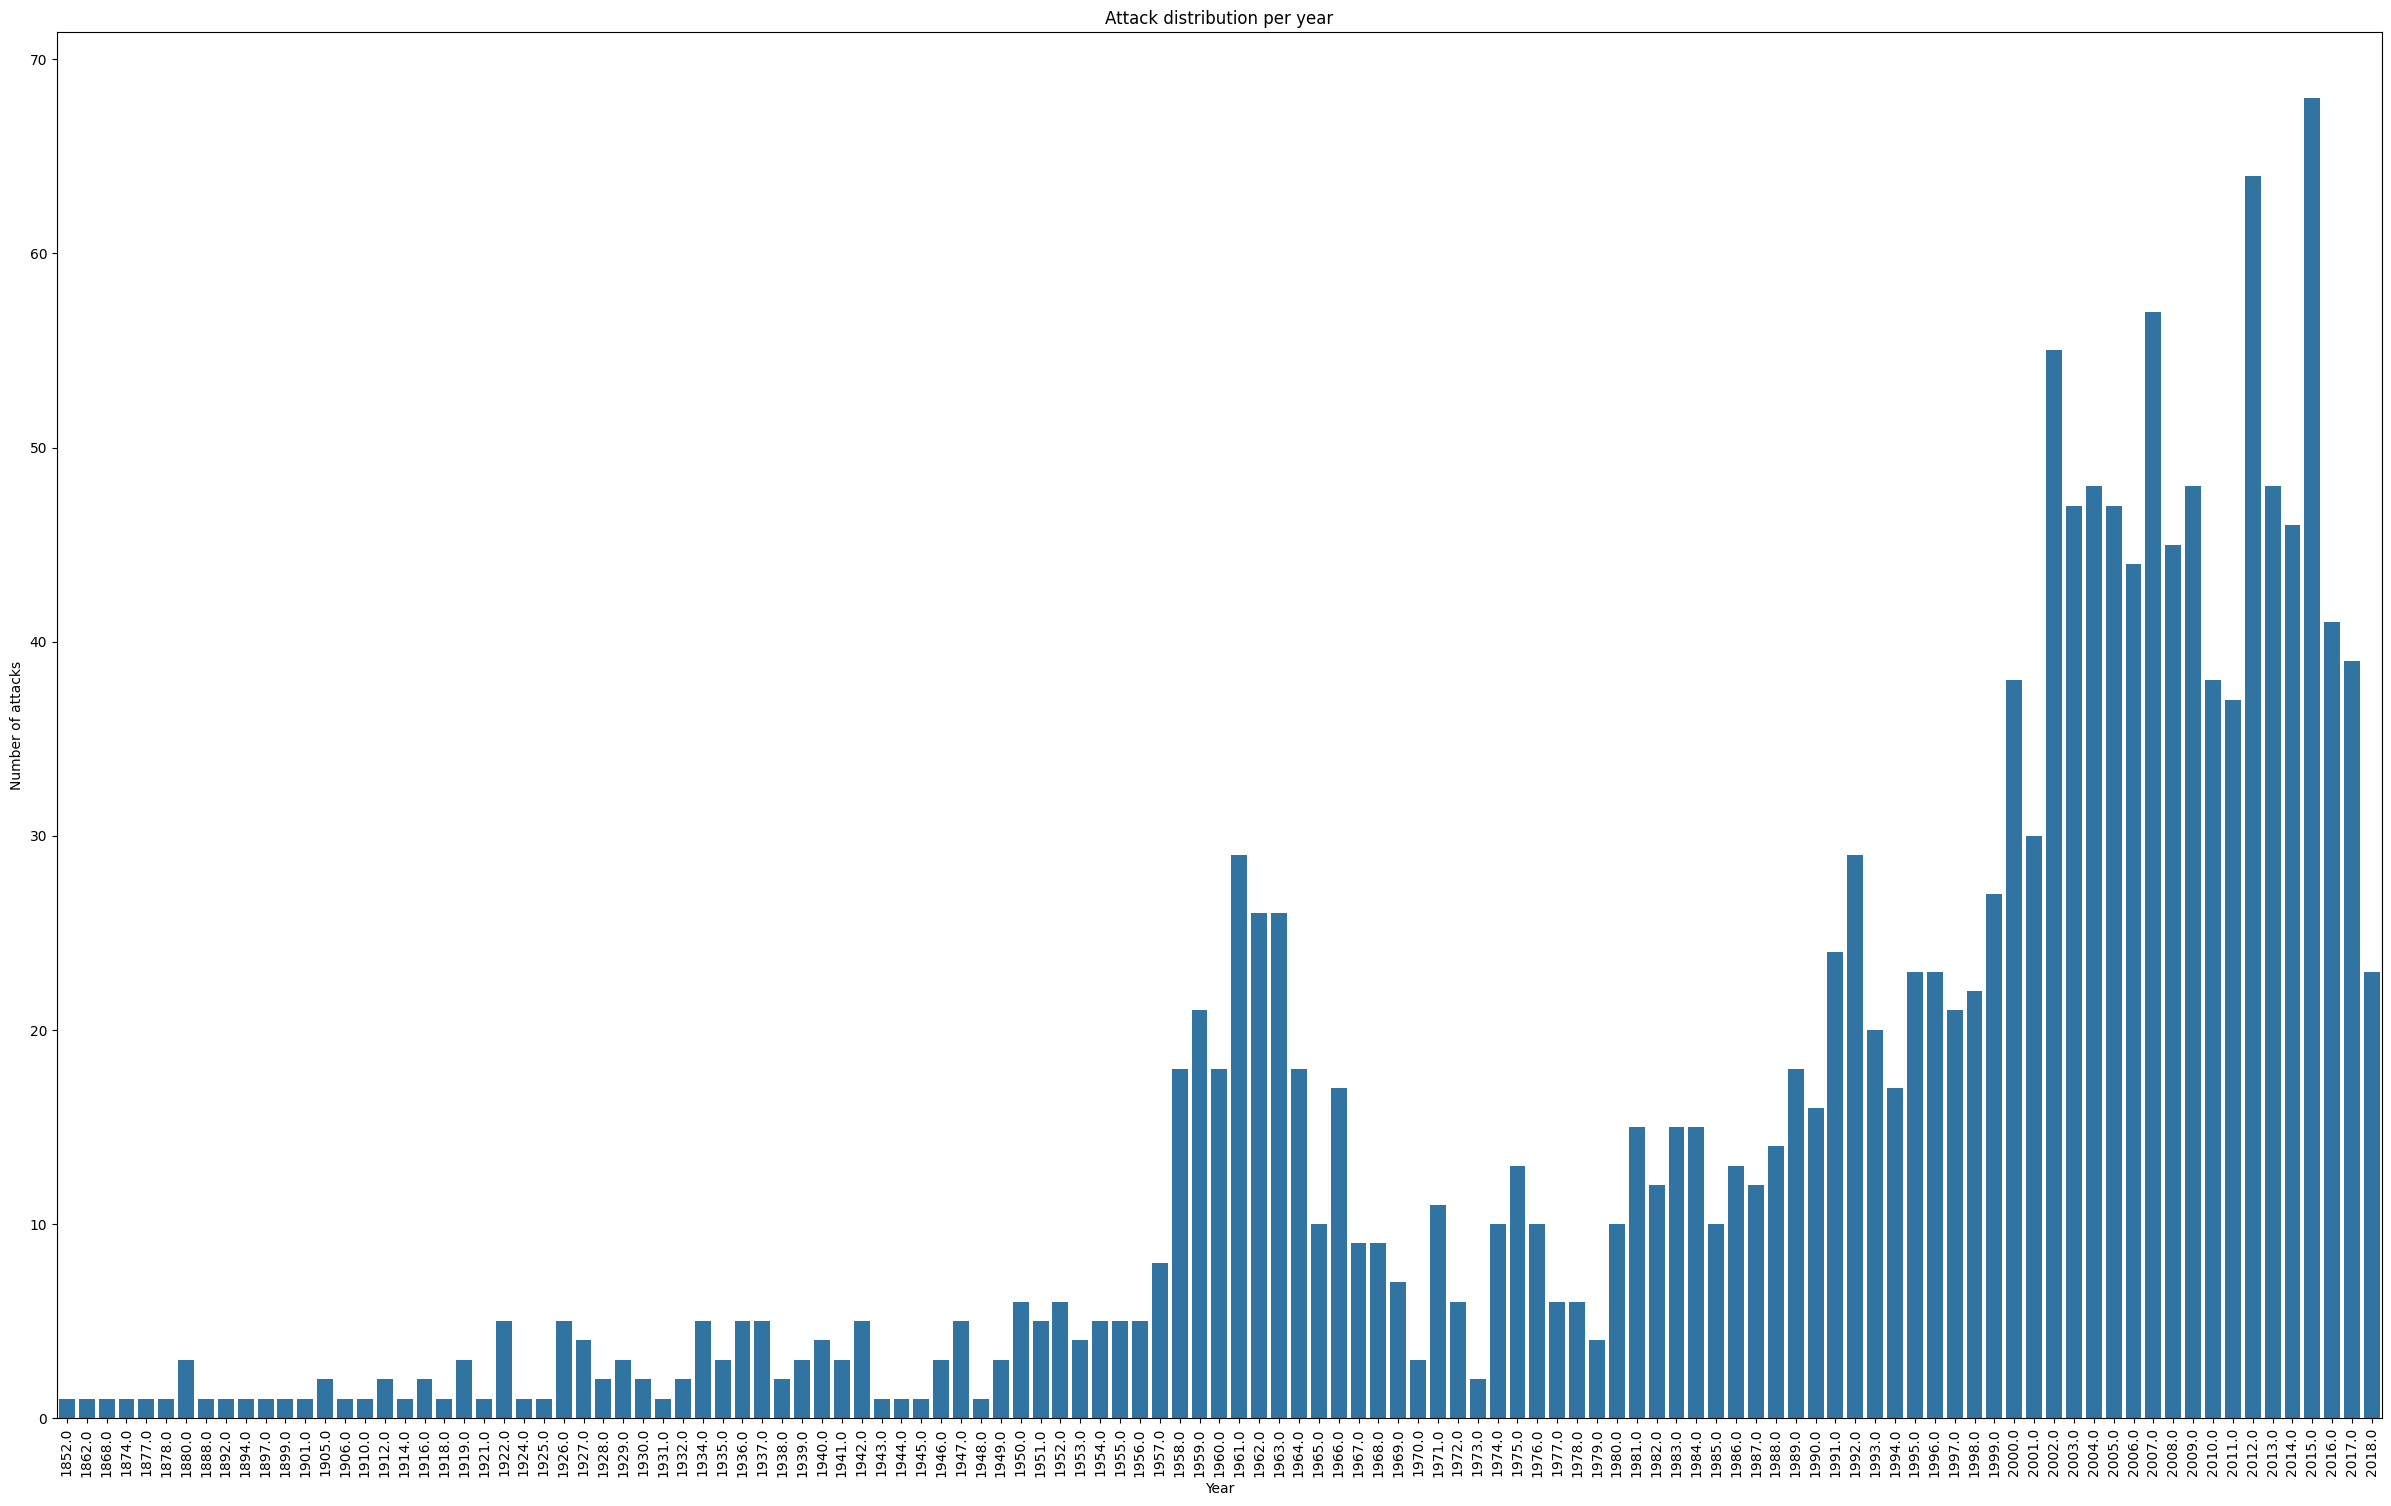

In [14]:
df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date'], errors='coerce')

df_cleaned['Year'] = df_cleaned['Date'].dt.year

plt.figure(figsize=(30, 18))
sns.countplot(x='Year', data=df_cleaned)
plt.title('Attack distribution per year')
plt.xlabel('Year')
plt.ylabel('Number of attacks')

plt.xticks(rotation=90)
plt.show()

C:\Users\aidag\AppData\Local\Temp\ipykernel_146412\2293967952.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Fatal (Y/N)'] = df_cleaned['Fatal(Y/N)'].map({'Y': 'Fatal', 'N': 'No Fatal'})


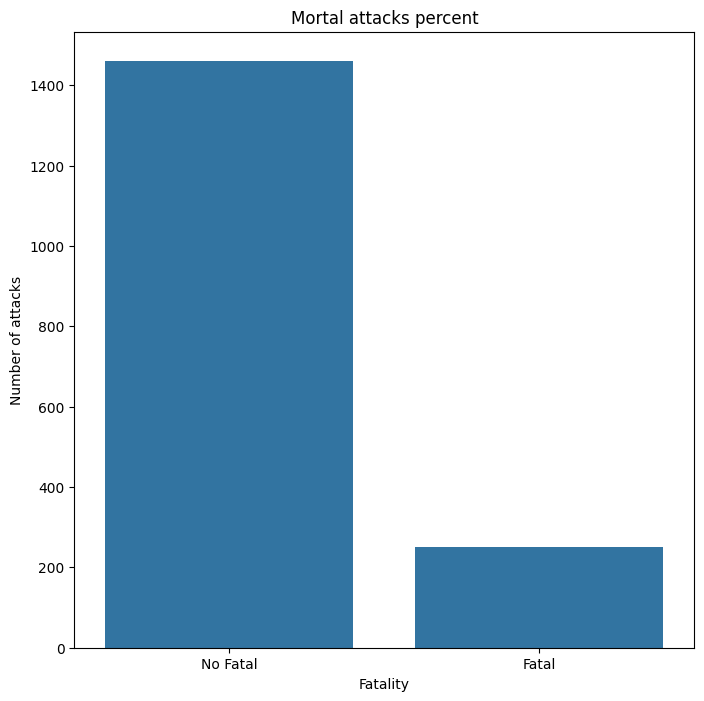

In [15]:
plt.figure(figsize=(8, 8))
df_cleaned['Fatal (Y/N)'] = df_cleaned['Fatal(Y/N)'].map({'Y': 'Fatal', 'N': 'No Fatal'})
sns.countplot(x='Fatal (Y/N)', data=df_cleaned)
plt.title('Mortal attacks percent')
plt.xlabel('Fatality')
plt.ylabel('Number of attacks')
plt.show()

In [36]:
data = df_cleaned.copy()

numerical_data = df_cleaned.select_dtypes(include=["int64", "float64"])
categorical_data = df_cleaned.select_dtypes("object")

selected_columns = ['Type', 'Country', 'Area', 'Activity', 'Fatal(Y/N)', 'Time', 'Species']

df_encoded = pd.get_dummies(df_cleaned[selected_columns], drop_first=True)

In [37]:
X = df_encoded.drop('Fatal(Y/N)_Y', axis=1)  
y = df_encoded['Fatal(Y/N)_Y']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

y_train

1717     True
3520    False
2064     True
4059    False
807     False
        ...  
2710    False
3250    False
2013    False
3864    False
2694     True
Name: Fatal(Y/N)_Y, Length: 1201, dtype: bool

In [38]:
scaler = StandardScaler()

scaler.fit(X_train)

StandardScaler()

In [39]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [43]:
lm = LinearRegression()

lm.fit(X_train_scaled, y_train)

y_predictions = lm.predict(X_test_scaled) 

rmse = mean_squared_error(y_test, y_predictions, squared=False) 
mae = mean_absolute_error(y_test, y_predictions)
print("R2_score:", round(r2_score(y_test, y_predictions), 2))
print("RMSE:", rmse)
print("MAE:", mae)

R2_score: 0.88
RMSE: 0.12469502159500441
MAE: 0.04348686908842765
